In [1]:
import os
# os.chdir('???')
os.getcwd()

'/Users/supakornbabe/stat_for_application/Lab_Materials-20190502'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
orig_df = pd.read_csv("big_mart_sales.csv")
orig_df.head(100)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
orig_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
orig_df.shape

(8523, 12)

In [7]:
df = orig_df.dropna()
X = df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]
y = df.Item_Outlet_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1104.420349162651, 0.46016469308453056]

Missing Value Ratio

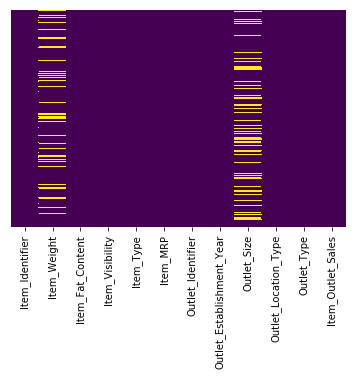

In [8]:
# use heatmap to visualize missing value (null) positions
df=orig_df
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# count missing values in each variable
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# find missing value percent
null_percent = df.isnull().sum()/len(df)*100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [11]:
# Replace missing values 

new_df = df
new_df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)  # replace with median  
new_df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)  # replace with mode
new_df.shape

(8523, 12)

In [12]:
# after replacing missing values, re-check %missing data
new_df.isnull().sum()/len(new_df)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [13]:
X = new_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]
y = new_df.Item_Outlet_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1416.2984770943895, 0.3482271334800481]

In [14]:
# instead of replacing missing values, drop the missing values instead
# remove variables with > 20% of missing values
df = orig_df
acceptable_missing_ratio = 20
variables = df.columns
updated_variables = [ ]
for i in range(0,len(df.columns)):  
    # if %missing value is less than or at least threshold, keep this variable
    if null_percent[i] <= acceptable_missing_ratio :          
        updated_variables.append(df.columns[i])
updated_variables

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [15]:
new_df = df[updated_variables]
new_df.shape      
# since one column (outlet size) is dropped, dataframe has only 11 columns left

(8523, 11)

In [16]:
# In case of dropping Item_weight (for missing values), find out error
X = new_df[['Item_Visibility','Item_MRP','Outlet_Establishment_Year']]
y = new_df.Item_Outlet_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1416.3204369380653, 0.34820692172178747]

Low Variance Filtering

In [17]:
#compute variances of numerical data columns
df = orig_df
df.var()

# Item_Visibility has lower variance, compared to other variables

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [18]:
# remove variables with low variance
temp_df = df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]
min_var_threshold = 10
new_variables = [ ]
for i in range(0,len(temp_df.var())):
    #setting the threshold of minimal variance = 10
    if temp_df.var()[i] >= min_var_threshold:   
        new_variables.append(temp_df.columns[i])
new_variables

['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

In [19]:
temp_df2 = temp_df[new_variables].dropna()
X = temp_df2[['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year']]
y = temp_df2['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1431.8546754575887, 0.3338307465216862]

High Correlation Filtering

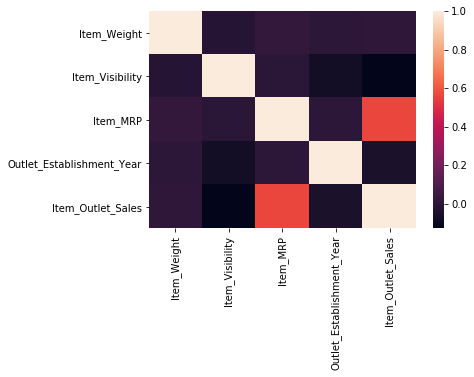

In [20]:
# plot correlation of numerical data
df = orig_df
sns.heatmap(df.corr())

In [21]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


In [22]:
# since Item_Outlet_Sales and Item_MRP have high correlation, drop dependent variables
new_df=df.drop('Item_Outlet_Sales', 1)
new_df.shape

(8523, 11)

Random Forest

In [23]:
df=orig_df.drop('Item_Outlet_Sales', 1)  # drop target variables
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [24]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [25]:
# since 'Item_Identifier', 'Outlet_Identifier' do not affect target variable, drop them
temp_df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
temp_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1


In [26]:
# change categorcial data column to numerical data
temp_df=pd.get_dummies(temp_df)  
temp_df.shape    # columns of temp_df = 36 (original df = 12)

(8523, 35)

/Users/supakornbabe/anaconda3/envs/stat_for_application_individual/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


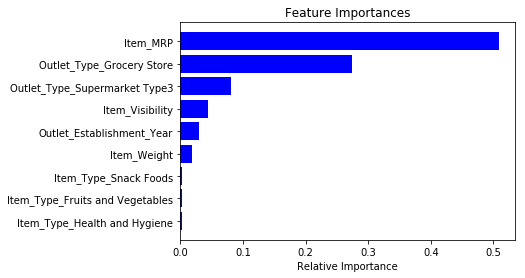

In [27]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
# run random forest after removing 'Item_Identifier', 'Outlet_Identifier'
model.fit(temp_df,orig_df.Item_Outlet_Sales)

# plot importance of features
features = temp_df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # sort top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# choose top most features

In [28]:
new_variables = ['Item_MRP','Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type3','Item_Visibility','Outlet_Establishment_Year','Item_Weight']
temp_df2 = temp_df[new_variables].dropna()
X = temp_df2
y = orig_df['Item_Outlet_Sales'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1154.3549767178527, 0.5670223692485807]

Backward Feature Elimination

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
n_features = 10  # define by yourself to select important features
df = temp_df  # df that changes from categorical data to numerical data
rfe = RFE(LinearRegression(), n_features)
result = rfe.fit(df, orig_df.Item_Outlet_Sales)

In [30]:
result.ranking_

array([25,  1, 16, 14,  5, 24,  6, 11,  1, 19, 23, 22, 10,  4, 15,  2, 21,
       17,  3, 20,  1,  1, 18,  1,  1,  9, 13,  7, 12, 26,  8,  1,  1,  1,
        1])

In [31]:
result.support_

array([False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True])

In [32]:
temp_df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object

In [33]:
new_variables = temp_df.columns[result.support_]
new_variables

Index(['Item_Visibility', 'Item_Fat_Content_reg', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [34]:
temp_df2 = temp_df[new_variables].dropna()
X = temp_df2
y = orig_df['Item_Outlet_Sales'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1527.255106555314, 0.24210355106554027]

Forward Feature Selection

In [35]:
from sklearn.feature_selection import f_regression
df = temp_df  # df that changes from categorical data to numerical data
ffs = f_regression(df, orig_df.Item_Outlet_Sales)
ffs

(array([8.00638865e-01, 1.43345451e+02, 4.04945623e+03, 2.06215699e+01,
        1.30806126e+00, 1.22585958e+00, 4.36138028e+00, 3.41026049e-01,
        1.95567521e+00, 1.25710921e+01, 4.63353942e-02, 1.84715461e-01,
        4.64996489e-01, 6.68692267e-01, 7.66102777e-01, 5.74173896e+00,
        1.33379794e-01, 5.58240389e+00, 2.10122944e+00, 7.64508603e-02,
        3.85572723e+00, 4.64101498e-01, 4.42472434e+00, 4.92726368e+00,
        1.92759704e+00, 4.98080532e+00, 4.84013114e+01, 8.33163800e+01,
        1.06854461e+02, 2.90220724e+01, 1.83660511e+01, 1.73932135e+03,
        1.02009171e+02, 1.23601667e+01, 9.13656782e+02]),
 array([3.70927701e-001, 9.04128718e-033, 0.00000000e+000, 5.67308211e-006,
        2.52778104e-001, 2.68245018e-001, 3.67921182e-002, 5.59253023e-001,
        1.62012996e-001, 3.93861711e-004, 8.29572434e-001, 6.67362647e-001,
        4.95316603e-001, 4.13530779e-001, 3.81450067e-001, 1.65878107e-002,
        7.14962237e-001, 1.81641436e-002, 1.47217554e-001, 7.8

In [36]:
f_value_threshold = 10  # set yourself to adjust 
new_variables = []
for i in range(0,len(df.columns)-1):
    if ffs[0][i] >= f_value_threshold:
        new_variables.append(df.columns[i])
new_variables

['Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Type_Baking Goods',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2']

In [37]:
temp_df2 = temp_df[new_variables].dropna()
X = temp_df2
y = orig_df['Item_Outlet_Sales'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1150.4748889680443, 0.5699281786241034]